1 - Utilizando os dados criados por vcs faça
1.1 - Reproduzir o grafico do slide L12_decision_trees 74. Ou seja, vcs deverão treinar uma árvore de decisão variando algum parâmetro que evite overfitting 
1.2 - O parâmetro a ser escolhido deve ser do tipo pré-prunning
1.3 - Deverão mensurar acurácia para cada parâmetro avaliado, na base de treino e na base de teste
1.4 - Usando alguma biblioteca plotar os resultados, obtendo algo parecido com a figura do slide 74
1.5 - Compartilhar o link (no colab, botão superior direito, compartilhar, alterar opção para "qualquer um com link pode visualizar", copiar link, e colar o link aqui para verificação)

**Importing Pandas library and data**

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados&colunas.csv')

d = {'eastern': 0,'western': 1}
df['Region'] = df['Region'].map(d)

X = df.iloc[:,:4].values
y = df['Region'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=0, stratify=y) #splitting into train and test

**Varying Min_Samples_Leaf in Decision Tree**

In [10]:
max=30
score_test = np.zeros(max)
score_train = np.zeros(max)

for i in range(1,max):
  pipe = Pipeline([('scaler', StandardScaler()), ('tree', tree.DecisionTreeClassifier(min_samples_leaf=i))])
  pipe = pipe.fit(X_train, y_train)
  score_train[i-1] = pipe.score(X_train,y_train)
  score_test[i-1] = pipe.score(X_test,y_test)

**Plotting Param x Score**

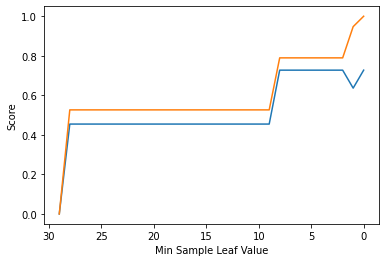

In [13]:
plt.xlabel("Min Sample Leaf Value")
plt.ylabel("Score")
plt.plot(score_test)
plt.plot(score_train)
plt.gca().invert_xaxis()

#When Min_Samples_Leaf= +-3 there's a drop in Test Score Accuracy, meaning overfitting